In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, roc_curve, auc


In [4]:
# Load the data 
data = pd.read_csv('Zoo.csv')

In [5]:
# Exploratory Data Analysis (EDA)
print(data.describe())
print(data.info())

             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
75%      1.000000    0.000000    1.000000    1.000000    0.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         predator     toothed    backbone    breathes    venomous        fins  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.554455    0.603960    0.821782    0.792079    0.079208    0.168317   
std      0.499505    0.4915

In [6]:
# Handle outliers (e.g., using IQR method)
Q1 = data['hair'].quantile(0.25)
Q3 = data['hair'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['hair'] >= lower_bound) & (data['hair'] <= upper_bound)]


In [7]:
data['animal name'] = pd.to_numeric(data['animal name'], errors='coerce')

In [8]:
# Split the data into features (X) and target (y)
X = data.iloc[1:, :-1]
y = data.iloc[1:, -1]

In [9]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# K-Nearest Neighbors Classifier
knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')

In [11]:
from sklearn.impute import SimpleImputer

# Create an imputer object 
imputer = SimpleImputer(strategy='mean')

# Impute missing values in X_train
X_train_imputed = imputer.fit_transform(X_train)

# Train the model with imputed data
model=knn.fit(X_train_imputed, y_train)

In [12]:
# Impute missing values in X_train
X_test_imputed = imputer.transform(X_test)

# Predict on the testing set
y_pred = knn.predict(X_test_imputed)


In [13]:
accuracy = accuracy_score(y_test, y_pred)
precision_micro = precision_score(y_test, y_pred, average='micro')
precision_macro = precision_score(y_test, y_pred, average='macro')
precision_weighted = precision_score(y_test, y_pred, average='weighted')


In [14]:
recall_micro = recall_score(y_test, y_pred, average='micro')
recall_macro = recall_score(y_test, y_pred, average='macro')
recall_weighted = recall_score(y_test, y_pred, average='weighted') 


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
f1_micro = f1_score(y_test, y_pred, average='micro')
f1_macro = f1_score(y_test, y_pred, average='macro') 
f1_weighted = f1_score(y_test, y_pred, average='weighted')

In [16]:
print("Accuracy:", accuracy)
print("Precision(micro):", precision_micro)
print("Precision (macro):", precision_macro)
print("Precision (weighted):", precision_weighted)

print("Recall (micro):", recall_micro)
print("Recall (macro):", recall_macro)
print("Recall (weighted):", recall_weighted)

print("F1-score (micro):", f1_micro)
print("F1-score (macro):", f1_macro)
print("F1-score (weighted):", f1_weighted)

Accuracy: 0.7
Precision(micro): 0.7
Precision (macro): 0.6190476190476192
Precision (weighted): 0.9166666666666667
Recall (micro): 0.7
Recall (macro): 0.5753968253968254
Recall (weighted): 0.7
F1-score (micro): 0.7
F1-score (macro): 0.5392857142857143
F1-score (weighted): 0.74875


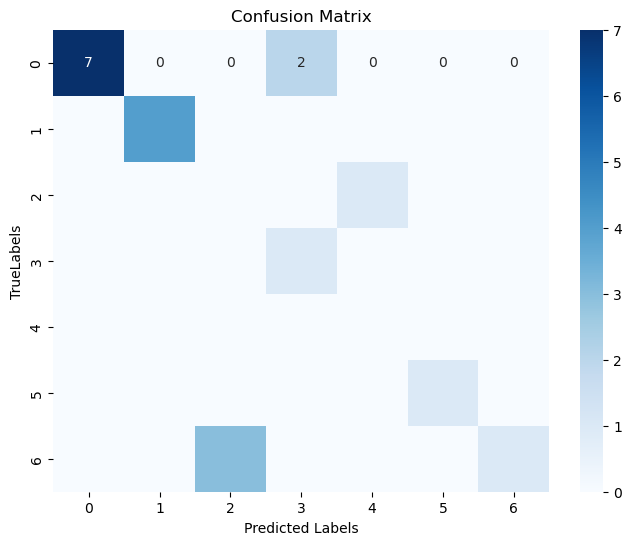

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix



# Create confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True,cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('TrueLabels')
plt.show()